In [1]:
import glob
import numpy as np
import pandas as pd
import plotly
import matplotlib.pyplot as plt
#import bottleneck as bn
from scipy import signal
import scipy

# Loading the data

In [2]:
#Sea-level curves
geo_wave_100=np.arange(-3*np.pi, -1*np.pi, (((3*np.pi)-(1*np.pi))/1e2))
rounding=2

A25m=25/2 #This means amplitude is -12.5 and +12.5
A50m=50/2 #This means amplitude is -25 and +25
A100m=100/2#This means amplitude is -50 and +50
f_0_1Ma=-10e6/.1e6 #20 full cycles, each of 0.5 Ma I made negative so that SL is low and delta progrades easily
f_0_5Ma=-10e6/.5e6 #20 full cycles, each of 0.5 Ma I made negative so that SL is low and delta progrades easily
f_5Ma=-10e6/5e6 

path='/live/share/Badlands_simulations'
# Loading the files with the metrics e.g. flexure, accumulation
Delta_SL0_Te50=pd.read_csv (path+'/Delta_2020/Delta_data_extraction/Synthetic/Delta_SL0_Te50.csv',sep=',', header=0)
Delta_SL_f5Myr_A25m_Te50=pd.read_csv(path+'/Delta_2020/Delta_data_extraction/Synthetic/Delta_SL_f5Myr_A25m_Te50.csv', sep=',',header=0)
Delta_SL_f500Kyr_A25m_Te50=pd.read_csv (path+'/Delta_2020/Delta_data_extraction/Synthetic/Delta_SL_f500Kyr_A25m_Te50.csv',sep=',', header=0)

#Loading the sea level curves
Delta_SL_f5Myr_A25m=pd.read_csv(path+'/Delta_2020/Delta_running/data/f5Myr_A25m.csv', sep=' ',header=None)
Delta_SL_f500Kyr_A25m=pd.read_csv(path+'/Delta_2020/Delta_running/data/f500Kyr_A25m.csv', sep=' ',header=None)


In [3]:
nperseg=99
nperseg=99
#Power spectra - Sea level
freqA25mf0_1Ma_1e2, psdA25mf0_1Ma_1e2=signal.welch(np.round(np.sin(geo_wave_100*f_0_1Ma),rounding)*A50m, nperseg = nperseg)
freqA25mf0_5Ma_1e2, psdA25mf0_5Ma_1e2=signal.welch(np.round(np.sin(geo_wave_100*f_0_5Ma),rounding)*A50m, nperseg = nperseg)
freqA25mf5Ma_1e2, psdA25mf5Ma_1e2=signal.welch(np.round(np.sin(geo_wave_100*f_5Ma),rounding)*A50m, nperseg = nperseg)

# Power spectra and detrending - Flexure
SW_Delta_SL_f5Myr_A25m_Te50_f_dt=signal.welch(signal.detrend(Delta_SL_f5Myr_A25m_Te50.Flexure_m[20:-1]),nperseg = nperseg)
SW_Delta_SL_f500Kyr_A25m_Te50_f_dt=signal.welch(signal.detrend(Delta_SL_f500Kyr_A25m_Te50.Flexure_m[20:-1]),nperseg = nperseg)

# Power spectra and detrending - River mouth distance
SW_Delta_SL_f5Myr_A25m_Te50_drm_dt=signal.welch(signal.detrend(Delta_SL_f5Myr_A25m_Te50.River_mouth_Lengh_m[20:-1]),nperseg = nperseg)
SW_Delta_SL_f500Kyr_A25m_Te50_drm_dt=signal.welch(signal.detrend(Delta_SL_f500Kyr_A25m_Te50.River_mouth_Lengh_m[20:-1]),nperseg = nperseg)

# Power spectra and detrending - Accumulation
SW_Delta_SL_f5Myr_A25m_Te50_acc_dt=signal.welch(signal.detrend(Delta_SL_f5Myr_A25m_Te50.Accumulation_m[20:-1]),nperseg = nperseg)
SW_Delta_SL_f500Kyr_A25m_Te50_acc_dt=signal.welch(signal.detrend(Delta_SL_f500Kyr_A25m_Te50.Accumulation_m[20:-1]),nperseg = nperseg)


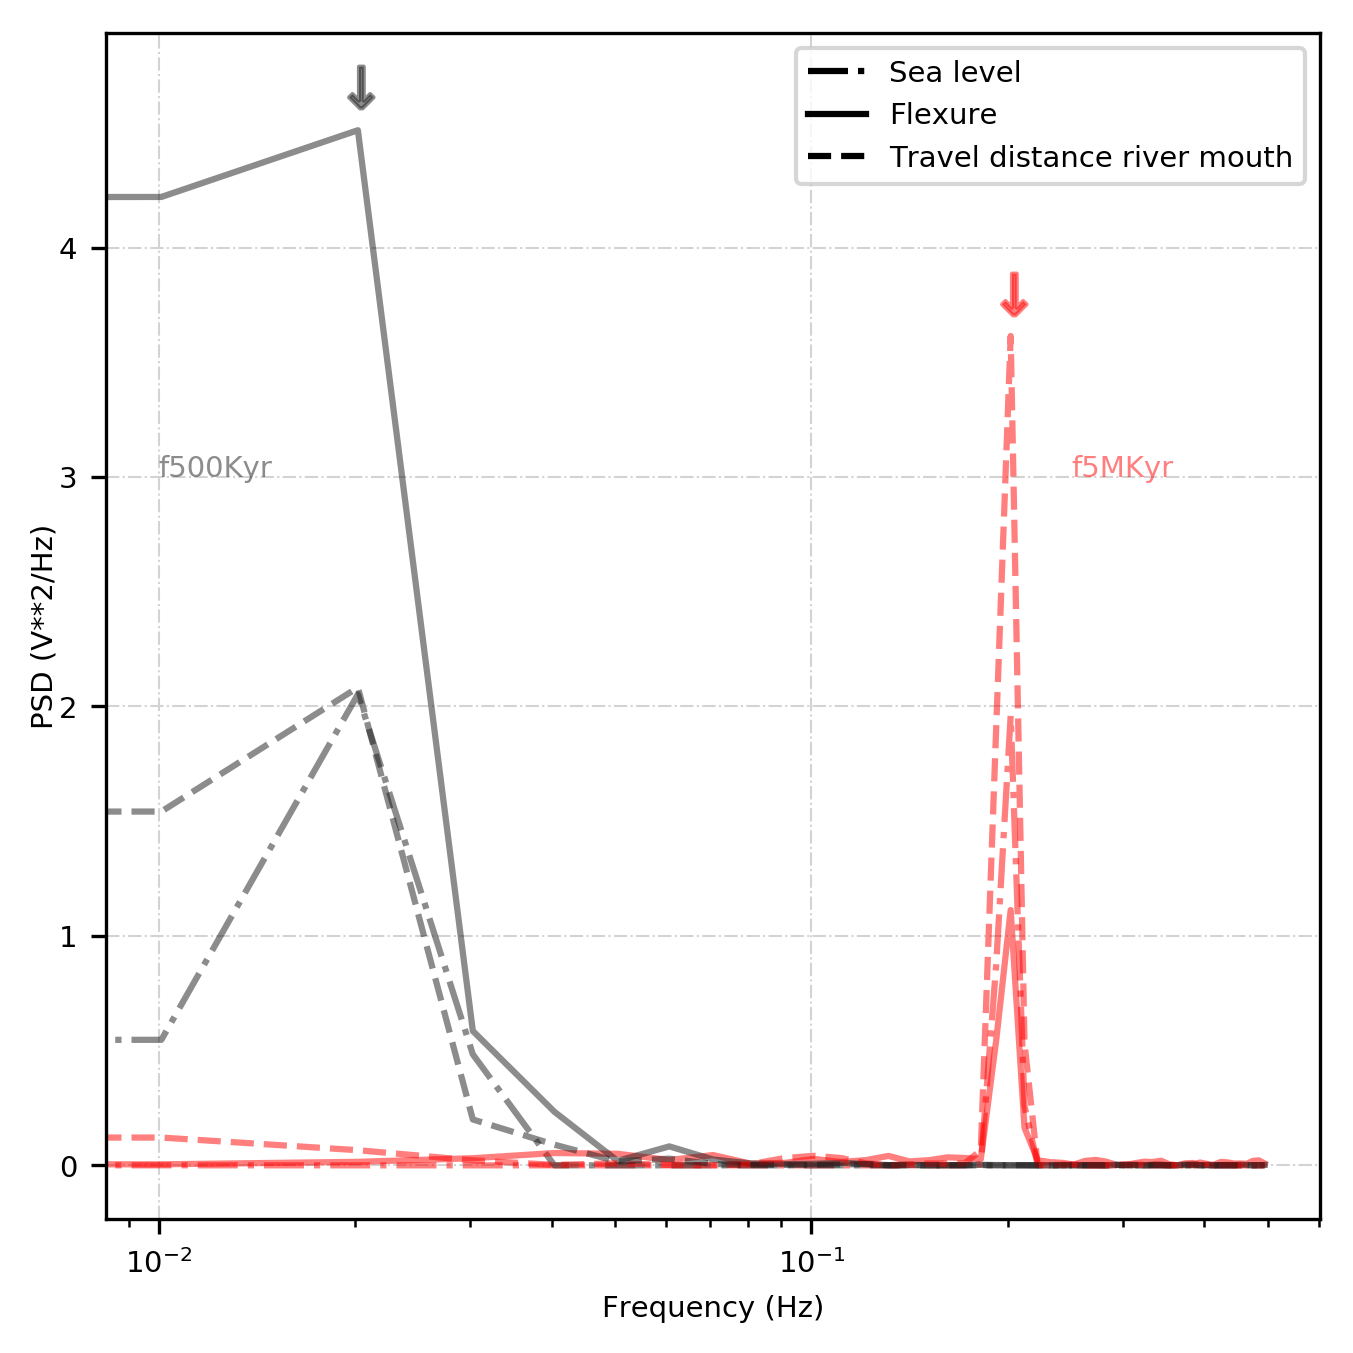

In [19]:
fig,ax = plt.subplots(nrows=1,ncols=1, figsize = (11/2.54, 11/2.54), dpi=300)
plt.rc("font", size=7)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

red=(1,0,0,.5)
grey=(0.1,0.1,0.1,0.5)
# SLf=1e-1
# Ff=1e-3
# DRMf=1e-9
SLf=1e-4
Ff=1e-6
DRMf=1e-12
#Sea level
plt.semilogx(freqA25mf0_5Ma_1e2, psdA25mf0_5Ma_1e2*SLf,'-.', label='f5Myr Sea Level', c=red)
plt.semilogx(freqA25mf5Ma_1e2, psdA25mf5Ma_1e2*SLf, '-.', label='f500Kyr Sea Level', c=grey)
#Flexure
plt.semilogx(SW_Delta_SL_f500Kyr_A25m_Te50_f_dt[0], SW_Delta_SL_f500Kyr_A25m_Te50_f_dt[1]*Ff, c=red, label='f5Myr flexure')
plt.semilogx(SW_Delta_SL_f5Myr_A25m_Te50_f_dt[0], SW_Delta_SL_f5Myr_A25m_Te50_f_dt[1]*Ff, c=grey, label='f500Kyr flexure')
#Distance to river mouth
plt.semilogx(SW_Delta_SL_f500Kyr_A25m_Te50_drm_dt[0], SW_Delta_SL_f500Kyr_A25m_Te50_drm_dt[1]*DRMf,'--',c=red, label='f5Myr river mouth')
plt.semilogx(SW_Delta_SL_f5Myr_A25m_Te50_drm_dt[0], SW_Delta_SL_f5Myr_A25m_Te50_drm_dt[1]*DRMf, '--', c=grey, label='f500Kyr river mouth')
#Accumulation
# plt.semilogx(SW_Delta_SL_f5Myr_A25m_Te50_acc_dt[0], SW_Delta_SL_f5Myr_A25m_Te50_acc_dt[1]*DRMf,'-*',c=red, label='f5Myr deposition')
# plt.semilogx(SW_Delta_SL_f5Myr_A25m_Te50_acc_dt[0], SW_Delta_SL_f5Myr_A25m_Te50_acc_dt[1]*DRMf, '-*', c=grey, label='f500Kyr deposition')

# plt.axvline(0.02, color=grey, linestyle=':')
# plt.axvline(0.2, color=red, linestyle=':')

plt.plot(0.02,4.7, marker=r'$\downarrow$', color=grey, markersize=10)
plt.plot(0.2,3.8, marker=r'$\downarrow$', color=red, markersize=10)

plt.text(10**-2,3, 'f500Kyr', color=grey)
plt.text(0.25,3, 'f5MKyr', color=red )


plt.tick_params(axis='both', which='major', labelsize=7)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V**2/Hz)',labelpad=0.10)
plt.legend(loc='best', borderaxespad=0.)
plt.grid(color='lightgrey', linestyle='-.', linewidth=0.5)

plt.tight_layout(pad=0.10)

#Change legend handles
import matplotlib.lines as mlines
sea_level = mlines.Line2D([], [], color='k', linestyle='-.', label='Sea level')
flexure= mlines.Line2D([], [], color='k', label='Flexure')
deposition= mlines.Line2D([], [], color='k',linestyle='--', label='Travel distance river mouth')

ax.legend(handles=[sea_level, flexure, deposition])

fig.savefig('./Power_spectra_synthetic_simulations.jpg')

# IH-GH

In [5]:
#Loading the sea level curves
SL_GH=pd.read_csv(path+'/Delta_2020/Delta_running/data/SL_GH.csv', sep=' ',header=None)
SL_IH=pd.read_csv(path+'/Delta_2020/Delta_running/data/SL_IH.csv', sep=' ',header=None)

#
Delta_SL_Oli_Te50=pd.read_csv (path+'/Delta_2020/Delta_data_extraction/IH_GH/Miller/Delta_SL_IH_Te50.csv',sep=',', header=0)
Delta_SL_Pal_Te50=pd.read_csv (path+'/Delta_2020/Delta_data_extraction/IH_GH/Miller/Delta_SL_GH_Te50.csv',sep=',', header=0)
Delta_SL_Oli_NoFlex=pd.read_csv (path+'/Delta_2020/Delta_data_extraction/IH_GH/Miller/Delta_SL_IH_NoFlex.csv',sep=',', header=0)
Delta_SL_Pal_NoFlex=pd.read_csv (path+'/Delta_2020/Delta_data_extraction/IH_GH/Miller/Delta_SL_GH_NoFlex.csv',sep=',', header=0)


In [6]:
# Power spectra and detrending - Flexure
Delta_SL_Oli_Te50_f_dt=signal.welch(signal.detrend(Delta_SL_Oli_Te50.Flexure_m[20:-1]),nperseg = nperseg)
Delta_SL_Pal_Te50_f_dt=signal.welch(signal.detrend(Delta_SL_Pal_Te50.Flexure_m[20:-1]),nperseg = nperseg)


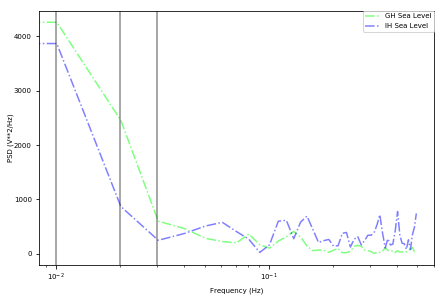

In [7]:
nperseg=99
freqGH, psdGH=signal.welch(SL_GH[1][20:-1],nperseg = nperseg)
freqIH, psdIH=signal.welch(SL_IH[1][20:-1],nperseg = nperseg)

plt.semilogx(freqGH, psdGH,'-.', label='GH Sea Level', c=(0,1,0,.5))
plt.semilogx(freqIH, psdIH,'-.', label='IH Sea Level', c=(0,0,1,.5))
plt.axvline(0.03, color=grey)
plt.axvline(0.02, color=grey)
plt.axvline(0.01, color=grey)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V**2/Hz)',labelpad=0.10)
plt.legend(loc='best', borderaxespad=0.)
plt.tight_layout(pad=0.10)


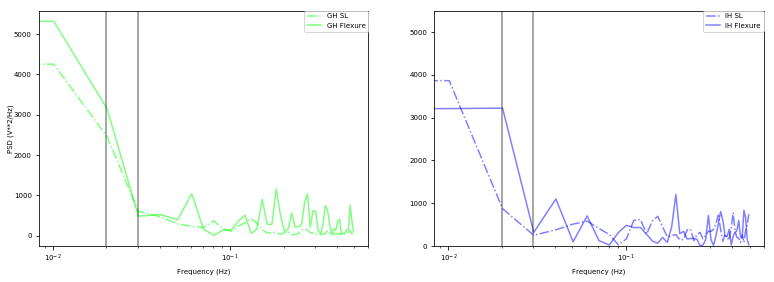

In [8]:
fig = plt.figure(figsize = (11*3/2.54, 11/2.54))

plt.subplot(1,2,1)

ff=1e-2
plt.semilogx(freqGH, psdGH,'-.', label='GH SL', c=(0,1,0,.5))
plt.semilogx(Delta_SL_Pal_Te50_f_dt[0], Delta_SL_Pal_Te50_f_dt[1]*ff, c=(0,1,0,.5), label='GH Flexure')
# plt.semilogx(Delta_SL_Oli_Te50_f_dt[0], Delta_SL_Oli_Te50_f_dt[1]*ff, c=(0,0,1,.5), label='IH')
plt.axvline(0.02, color=grey)
plt.axvline(0.03, color=grey)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (V**2/Hz)',labelpad=0.10)
plt.legend(loc='best', borderaxespad=0.)


#plt.axvline(0.2, color=red)
plt.subplot(1,2,2)
plt.semilogx(freqIH, psdIH,'-.', label='IH SL', c=(0,0,1,.5))
plt.semilogx(Delta_SL_Oli_Te50_f_dt[0], Delta_SL_Oli_Te50_f_dt[1]*ff, c=(0,0,1,.5), label='IH Flexure')
plt.axvline(0.02, color=grey)
plt.axvline(0.03, color=grey)
plt.ylim(0,5.5e3)
plt.xlabel('Frequency (Hz)')
plt.legend(loc='best', borderaxespad=0.)
